Chapter 24

# 统计视角下的回归
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

在这段代码中，我们首先定义了一个用于可视化鸡和兔子数量关系的函数。然后生成两个数组，分别表示不同实验中鸡和兔子的数量。通过计算这些数量的标准差和相关系数，我们得到了变量之间的关系。接着，利用线性回归模型计算出最佳拟合线的斜率$a$和截距$b$。

具体而言，斜率$a$的计算公式为：

$$
a = \frac{\text{Cov}(X, Y)}{\text{Var}(X)}
$$

其中，$\text{Cov}(X, Y)$是鸡和兔子数量之间的协方差，而$\text{Var}(X)$是鸡数量的方差。截距$b$的计算则使用了均值：

$$
b = \bar{Y} - a \cdot \bar{X}
$$

其中，$\bar{Y}$和$\bar{X}$分别是兔子数量和鸡数量的均值。

接着，使用散点图和回归线展示了鸡的数量与兔子的数量之间的关系。回归线的方程为：

$$
y = ax + b
$$

其中$y$是兔子的数量，$x$是鸡的数量。最后，使用`sklearn`库中的`LinearRegression`模型对数据进行拟合，并输出计算得到的斜率和截距，以便与之前的结果进行比较。

通过这种方式，代码不仅展示了如何计算线性回归参数，还通过可视化方式帮助理解不同变量之间的关系，尤其是在动物数量的生态学研究中，这种分析方法可以揭示它们之间的相互影响。

## 导入必要的库

In [1]:
import numpy as np  # 导入NumPy库，用于数值计算
import seaborn as sns  # 导入Seaborn库，用于绘制回归线
import matplotlib.pyplot as plt  # 导入Matplotlib库，用于绘图

## 定义图形装饰函数

In [2]:
def fig_decor(ax):  # 自定义函数，用于装饰图形
    plt.xlabel('$x$ (number of chickens)')  # 设置x轴标签，表示鸡的数量
    plt.ylabel('$y$ (number of rabbits)')  # 设置y轴标签，表示兔的数量
    plt.axis('scaled')  # 设置坐标轴比例相同
    ax.set_xlim([0, 120])  # 设置x轴范围为[0, 120]
    ax.set_ylim([0, 80])  # 设置y轴范围为[0, 80]
    plt.xticks(np.arange(0, 120 + 1, step=10))  # 设置x轴刻度，每10为一档
    plt.yticks(np.arange(0, 80 + 1, step=10))  # 设置y轴刻度，每10为一档
    plt.minorticks_on()  # 开启次刻度显示
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color=[0.8, 0.8, 0.8])  # 设置次刻度网格线样式
    ax.spines['top'].set_visible(False)  # 隐藏顶部坐标轴
    ax.spines['right'].set_visible(False)  # 隐藏右侧坐标轴
    ax.spines['bottom'].set_visible(False)  # 隐藏底部坐标轴
    ax.spines['left'].set_visible(False)  # 隐藏左侧坐标轴
    ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])  # 设置主刻度网格线样式

## 定义鸡和兔的数量数据

In [3]:
num_chickens = np.array([32, 110, 71, 79, 45, 20, 56, 55, 87, 68, 87, 63, 31, 88])  # 鸡的数量数据
num_rabbits = np.array([22, 53, 39, 40, 25, 15, 34, 34, 52, 41, 43, 33, 24, 52])  # 兔的数量数据

## 计算统计量

In [4]:
sigma_X = num_chickens.std(ddof=1)  # 计算鸡的数量的标准差
sigma_Y = num_rabbits.std(ddof=1)  # 计算兔的数量的标准差
rho_XY = np.corrcoef(num_chickens, num_rabbits)[1][0]  # 计算鸡和兔数量的相关系数
mean_X = num_chickens.mean()  # 计算鸡的数量的均值
mean_Y = num_rabbits.mean()  # 计算兔的数量的均值

## 计算回归系数

In [5]:
a = rho_XY * sigma_Y / sigma_X  # 根据公式计算斜率
b = -a * mean_X + mean_Y  # 根据公式计算截距

## 打印斜率和截距

In [6]:
print('=== Slope, a ===')  # 输出斜率的标题
print(a)  # 输出斜率的值
print('=== Intercept, b ===')  # 输出截距的标题
print(b)  # 输出截距的值

=== Slope, a ===
0.44338807260155577
=== Intercept, b ===
7.964131374243731


## 绘制回归图

In [7]:
x_array = np.linspace(0, 120, 20)  # 创建x轴的取值范围

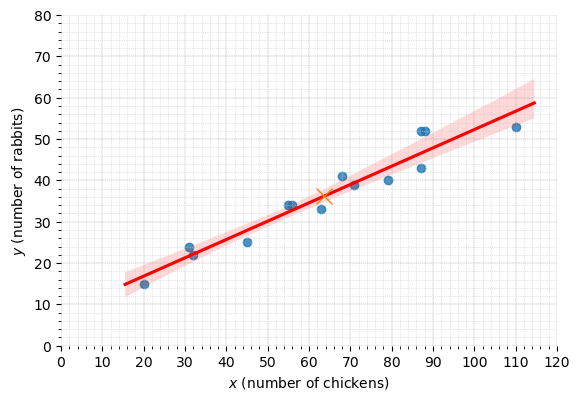

In [8]:
fig, ax = plt.subplots()  # 创建一个新的图形和坐标轴
sns.regplot(x=num_chickens, y=num_rabbits, ax=ax, truncate=False, line_kws={"color": "red"})  # 使用Seaborn绘制回归线
plt.plot(mean_X, mean_Y, marker='x', markerfacecolor='r', markersize=12)  # 在均值点位置绘制标记
fig_decor(ax)  # 调用图形装饰函数，设置图形样式

## 使用sklearn计算线性回归模型

In [9]:
from sklearn.linear_model import LinearRegression  # 导入sklearn的线性回归模块

In [10]:
x = num_chickens.reshape((-1, 1))  # 将鸡的数量数据重塑为列向量
y = num_rabbits  # 定义兔的数量数据

In [11]:
model = LinearRegression().fit(x, y)  # 拟合线性回归模型

In [12]:
print('Slope, a:', model.coef_)  # 打印模型的斜率
print('Intercept, b:', model.intercept_)  # 打印模型的截距

Slope, a: [0.44338807]
Intercept, b: 7.964131374243742
